Imagine having a sample of $N(t)$ radioactive nuclei at time t. Simulate the decay of the sample by increasing the time $t$ in discrete steps of $\Delta{t}$, and at each time count how many nuclei have decayed during the last $\Delta{t}$ interval. The simulation quits when there are no nuclei left. The probability of a nucleus to decay per unit of time should be $\lambda = 0.03 s^{−1}$.


In [2]:
import numpy as np
import matplotlib.pyplot as plt


Repeat the simulation for $N(0) = 10, 100, 1000, 10000$ and $100000$, and plot the $log N(t)$ versus time $t$ in a single plot. Also add the theory lines for the continuous decay model (for which $N \to \infty$ and $\Delta{t} \to 0$ is assumed), i.e. $N_{cont.}(t) = N(0)e^{- \lambda t}$.
Approximately, for which $log N$ do the simulation results begin to appear stochastic (instead of approximating an exponential)?

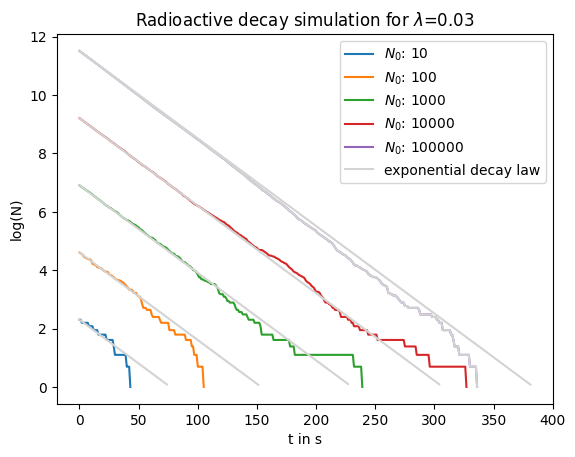

In [37]:
prob_decay_1 = 0.03

def N(N_0, prob_decay, return_log=True):
    list_N = [N_0] 
    while list_N[-1] > 1:
        N_new = list_N[-1] - dN(list_N[-1], prob_decay)
        list_N.append(N_new) 
    if return_log:
        list_N = [np.log(n) for n in list_N]
    return np.array(list_N)

def dN(N, decay_prob):
    r = 0
    p = decay_prob
    for i in range(N):
        d = np.random.uniform()
        if d<p:
            r +=1
    return r

def exponential_decay(N_0, t, prob_decay, return_log=True):
    N= N_0*np.exp(-prob_decay*t)
    if return_log:
        N = np.log(N)
    return N

def estimate_time_decay(N_0, prob_decay):
    tmax = 0
    N = N_0
    while N>0.1:
        tmax = tmax+1
        N = exponential_decay(N_0, tmax, prob_decay)
    return tmax, N


def plot_decay(pd):
    for n0 in [10,100,1000,10000,100000]:
        np.random.seed(42)
        simulation_radioactive_decay = N(n0, pd)
        t = np.arange(simulation_radioactive_decay.shape[0])
        t_theor = np.linspace(0, estimate_time_decay(n0, pd)[0], len(t))
        plt.plot(t, simulation_radioactive_decay, label=f"$N_0$: {n0}")
        plt.plot(t_theor, [exponential_decay(n0, t_i, pd) for t_i in t_theor],"lightgrey")
    plt.plot(t, simulation_radioactive_decay, "lightgrey", label="exponential decay law")
    plt.title(f"Radioactive decay simulation for $\lambda$={pd}")
    plt.xlabel("t in s")
    plt.ylabel("log(N)")
    plt.legend()
    
plot_decay(prob_decay_1)

Approximately for log(N)=4, the simulation results stop following the exponential decay function and start to be stochastic.

Repeat the simulations and plotting as in part a), but using $\lambda = 0.3 s^{-1}$. What do you observe? Explain your finding

C:\Users\corin\AppData\Local\Temp\ipykernel_9480\1962688179.py:9: RuntimeWarning: divide by zero encountered in log
  list_N = [np.log(n) for n in list_N]


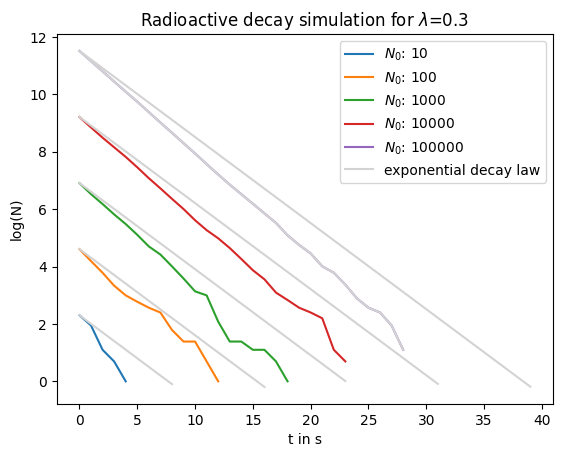

In [38]:
prob_decay_2 = 0.3
plot_decay(prob_decay_2)

As expected, the total time until the number of nuclei approaches zero is much shorter when $\lambda$ is large. In general, the simulation derives more and more from the exponential decay law when N decreases. This makes sense, because the exponential decay law only holds for $N \to \infty$. Furthermore, the simulation for $\lambda = 0.3$ derives more from the exponential decay law. The high decay rate would require more nuclei from the start to suit the model. A higher decay rate can be understood as an increase of the length of each time step, hence more nuclei decay within one $\Delta{t}$. This contradicts the exponential decay law, because it requires $\Delta{t} \to 0$